In [1]:
from PIL import Image, ImageFilter
from scipy.ndimage.filters import convolve
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as st
from skimage.morphology import erosion, dilation
from scipy.ndimage import gaussian_filter
from skimage.filters import threshold_otsu
from skimage import measure, util

C:\Users\T R N V A N M A N H\AppData\Local\Temp\ipykernel_11828\32893984.py:2: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


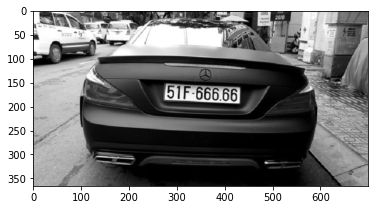

In [13]:
car_gray = np.asarray(Image.open('car4.jpg').convert('L'))
plt.imshow(car_gray, cmap='gray')
plt.show()

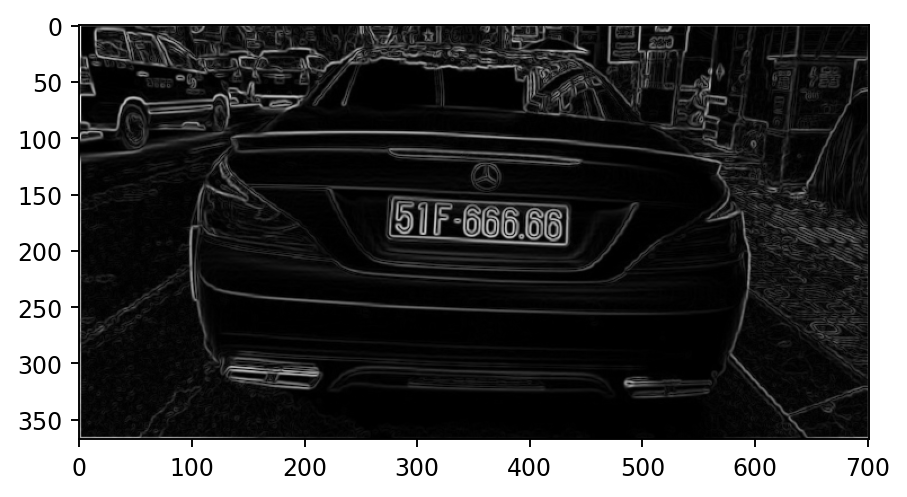

In [14]:
# Sobel filter
def sobel_edge_detect(image):
    sobel_x = np.array([[1, 0, -1], [2, 0 ,-2], [1, 0, -1]])
    sobel_y = np.array([[1, 2, 1], [0, 0 ,0], [-1, -2, -1]])
    image_x = signal.convolve2d(image, sobel_x)
    plt.figure(dpi=170)
#     plt.subplot(1, 3, 1)
#     plt.title('Horizontal')
#     plt.imshow(image_x, cmap='gray')
    image_y = signal.convolve2d(image, sobel_y)
#     plt.subplot(1, 3, 2)
#     plt.title('Vertical')
#     plt.imshow(image_y, cmap='gray')
    edge_detected = np.sqrt(np.square(image_x) + np.square(image_y))
#     plt.subplot(1, 3, 3)
#     plt.title('H + V')
    plt.imshow(edge_detected, cmap='gray')
    return edge_detected

edge_car = sobel_edge_detect(car_gray)

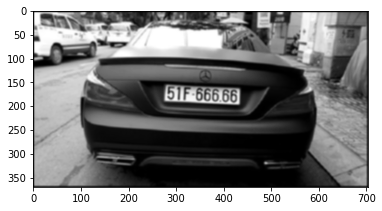

In [16]:
def gaussian_filter(size, nsig=1):
        x = np.linspace(-nsig, nsig, size+1)
        ker1d = np.diff(st.norm.cdf(x))
        ker2d = np.outer(ker1d, ker1d)
        return ker2d

def gaussian_blur(image, kernel_size=5):
#         try:
            blured_img = signal.convolve2d(image, gaussian_filter(kernel_size))
#             img = Image.fromarray(blured_img)
#             self.image_display(img)
#             print('LOG:. blured')
#             print('...', img.size)
#         except Exception as e:
#             print(e,'\nERROR: Gray scale first')
            return blured_img

car_blurred = gaussian_blur(car_gray, 5)
plt.imshow(car_blurred, cmap='gray')
plt.show()

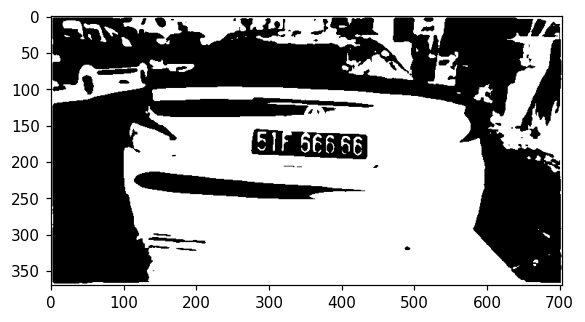

In [17]:
threshold_value = threshold_otsu(car_blurred)
car_binary = np.invert(car_blurred > threshold_value)
plt.figure(dpi=110)
plt.imshow(car_binary, cmap='gray')
plt.show()

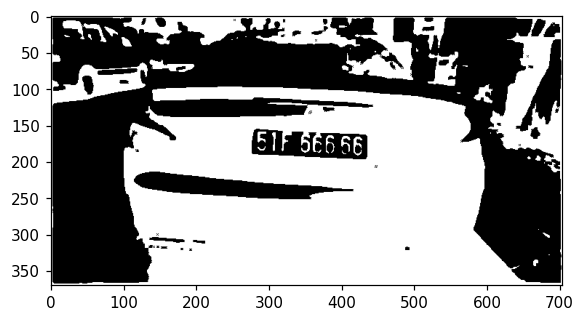

In [18]:
def _erosion(image, filter=[]):
    if not filter:
        erosion_filter = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    else:
        erosion_filter = np.array(filter)
    erosed = erosion(image, erosion_filter)
    return erosed

def _dilation(image, filter=[]):
    if not filter:
        dilation_filter = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    else:
        dilation_filter = np.array(filter)
    dilated = dilation(image, dilation_filter)
    return dilated

def eros_img(image):
#         try:
    erosed = _erosion(image)
    return erosed
#             self.image_display(erosed)
#             print('LOG:. Erosion')
#         except Exception as e:
#             print('ERROR:. ',e, '\n\t => Gray scale first')
        
def dilate_img(image):
#         try:
    dilated = self._dilation(image)
#             self.image_display(dilated)
#             print('LOG:. Dilation')
#         except Exception as e:
#             print('ERROR:. ',e, '\n\t => Gray scale first')
    return dilated

def _opening(image):
#         try:
    filter = [[1,0,1],[0,1,0],[1,0,1]]
    img = _erosion(image, filter)
    img = _dilation(img, filter)
#             self.image_display(img)
#             print('LOG:. Opening')
#         except Exception as e:
#             print("ERROR:. Turn image to Gray first!")
    return img

def _closing(image):
#         try:
    filter = [[1,0,1],[0,1,0],[1,0,1]]
    img=_dilation(image, filter)
    img=_erosion(img,filter)
#             self.image_display(img)
#             print('LOG:. Closing')
#         except Exception as e:
#             print("ERROR:. Turn image to Gray first!")
    return img

car_closed = _closing(car_binary)
plt.figure(dpi=110)
plt.imshow(car_closed, cmap='gray')
plt.show()

NameError: name 'text_like_regions' is not defined

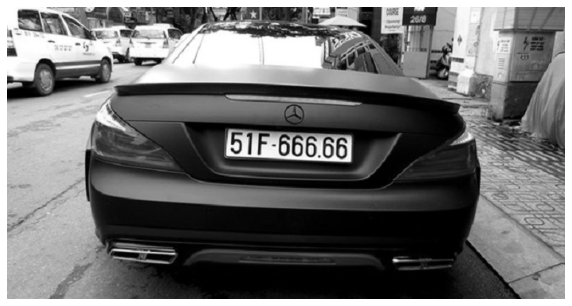

In [19]:
car_labeled = measure.label(car_closed, connectivity=2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")
ax.imshow(car_gray, cmap="gray")

for region in measure.regionprops(car_labeled):
    minr, minc, maxr, maxc = region.bbox
    w = maxc - minc
    h = maxr - minr
    
    ratio = w/h
    probably_text = False
    
    region_area = w*h
    
    # The aspect ratio is constrained to lie between 0.1 and 10 to eliminate
    # highly elongated regions
        
    # The size of the EB should be
    # greater than 15 pixels but smaller than 1/5th of the image
    # dimension to be considered for further processing
    
    wid,hei = car_blurred.shape
    img_area = wid*hei
    
    if region_area > 15 and region_area < (0.2 * img_area) and ratio < 1 and h > w:
        #print(w, h, i, region.area, region.bbox)
        probably_text = True
    
    if probably_text:
        text_like_regions.append(region)
        
for region in text_like_regions:
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
plt.tight_layout()
plt.show()

In [20]:
3 in range(1, 10)

True